In [43]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

In [44]:
df=pd.read_csv("Company.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [45]:
## one thing is Clear in Machine Learning Customer_id is no use 
df.drop("customerID",axis='columns',inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [47]:
## As you can see from above un code the values are in Strings But i need to convert them into the Numeric Values
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
## Here errors Coerce Beacuse of the If there are any spaces between them 

In [48]:
df.iloc[0]["TotalCharges"]

29.85

In [49]:
df.shape

(7043, 20)

In [50]:
## Here we stating if its nots eqaul to Space then Drop it 
df1=df[df.TotalCharges!='']


In [51]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

In [52]:
df1.TotalCharges.dtypes

dtype('float64')

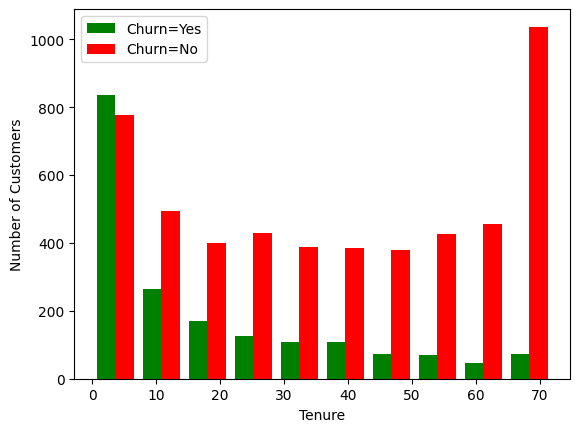

In [53]:
## Here from these Datset WE are Defing or Getting to Know that Whether the Particlar Customer is Leavng the Comonay or Not 
## Here as you can see Churn No Means The Employee is Not leaving 
tenure_churn_no=df1[df1.Churn=='No'].tenure
tenure_churn_Yes=df1[df1.Churn=='Yes'].tenure
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")
plt.hist([tenure_churn_Yes,tenure_churn_no],color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [54]:
def print_Unique_Values(df1):
   for column in df1:
     if df[column].dtypes=='object':
    
    
        print(df1[column].unique())

In [55]:
## These Function Gives us The unique values Which are Having Dattype as Object
print_Unique_Values(df1)

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [56]:
df1.replace("No internet service",'No', inplace=True)
df1.replace("No phone service",'No',inplace=True )

In [57]:
print_Unique_Values(df1)

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['No' 'Yes']


In [58]:
yes_no_Columns = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'Churn'
]

for col in yes_no_Columns:
    df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)


C:\Users\Heman\AppData\Local\Temp\ipykernel_16024\2705337999.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1, 'No': 0}, inplace=True)
C:\Users\Heman\AppData\Local\Temp\ipykernel_16024\2705337999.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes

In [59]:
for column in df1:
     
    
    
        print(df1[column].unique())

['Female' 'Male']
[0 1]
[1 0]
[0 1]
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
[0 1]
[0 1]
['DSL' 'Fiber optic' 'No']
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
['Month-to-month' 'One year' 'Two year']
[1 0]
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
[0 1]


In [60]:
df1['gender'].replace({"Female":1,"Male":0},inplace=True)


C:\Users\Heman\AppData\Local\Temp\ipykernel_16024\2307240372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({"Female":1,"Male":0},inplace=True)
C:\Users\Heman\AppData\Local\Temp\ipykernel_16024\2307240372.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [61]:
df1["gender"].unique()

array([1, 0], dtype=int64)

In [62]:
## Here you just need to know Good idea About Hot -Encoding 
## Hot Encoding is just like Classfiing something based on Row or Coulmn Number 
## think you have ten classifcation like animals Cat,Dog,Elephant,Lion 
## Now you want Classifythem based on Column Number oR Row Number like [0,0,0,1] These Means it is Indicating the Lion 


In [63]:
## Here using pandas Dummy You will create the Columns Which are NEssecery for the Thing '

## Here for one Colum it will Create three More Columns in Chart
df2 = pd.get_dummies(
    data=df1,
    columns=['InternetService', 'Contract', 'PaymentMethod'],
    dtype=int  # ensures 0/1 instead of True/False
)
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [64]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int32
InternetService_Fiber optic                  int32
InternetService_No             

In [65]:
## Scaling is just Enhanced Version of the Hot Encoding Thing Here what we will dp is 
## Like monthly Cahrges will have Large Unit values like 1000 or 1200 
## We willllc onvert them into the Range of 0 or 1
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
## After these Call the Fit_Tarnformer 
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])

In [66]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4786,0,0,0,0,1.000000,1,1,0,1,1,...,0,1,0,0,0,1,0,0,1,0
4277,1,0,0,0,0.083333,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4441,0,0,1,0,0.583333,1,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0


In [67]:
## Here that i am doing is In x I will be Dropping 
## Here main Intension of the Project is to check why people are leaving Compny 
## For that i need to add the Main thing output Layer into the One Y Thing 
## Remaing i need to add to x so 
X=df2.drop('Churn',axis='columns')
y=df2["Churn"]

In [68]:
## Her Tarin Test Split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=5)

In [69]:
len(X_train.columns)

26

In [70]:
import tensorflow as tf
from tensorflow import keras
##Total number of Columsn 

In [74]:
np.isnan(X_train).sum(), np.isnan(y_train).sum()
np.isinf(X_train).sum(), np.isinf(y_train).sum()


(gender                                     0
 SeniorCitizen                              0
 Partner                                    0
 Dependents                                 0
 tenure                                     0
 PhoneService                               0
 MultipleLines                              0
 OnlineSecurity                             0
 OnlineBackup                               0
 DeviceProtection                           0
 TechSupport                                0
 StreamingTV                                0
 StreamingMovies                            0
 PaperlessBilling                           0
 MonthlyCharges                             0
 TotalCharges                               0
 InternetService_DSL                        0
 InternetService_Fiber optic                0
 InternetService_No                         0
 Contract_Month-to-month                    0
 Contract_One year                          0
 Contract_Two year                

In [73]:
## Now lets Tarin Neurol Network Model  ## Here 20 Layers Input layer
model=keras.Sequential([keras.layers.Dense(63,input_shape=(26,),activation='relu'),
                        
 ## Now Hidden layer 
       keras.layers.Dense(15,activation='relu'),
       keras.layers.Dense(15,activation='relu'),                 
  ## Now OutPut layer                      
       keras.layers.Dense(1,activation='sigmoid')    ,             
                        
                        
    
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
199/199 [==============================] - 2s 5ms/step - loss: nan - accuracy: 0.7375
Epoch 2/50
199/199 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 3/50
199/199 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 4/50
199/199 [==============================] - 1s 5ms/step - loss: nan - accuracy: 0.7373
Epoch 5/50
199/199 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 6/50
199/199 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 7/50
199/199 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 8/50
199/199 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 9/50
199/199 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 10/50
199/199 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7373
Epoch 11/50
199/199 [========

In [75]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [76]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 1s 4ms/step - loss: nan - accuracy: 0.7106


[nan, 0.7106382846832275]

In [77]:
yp=model.predict(X_test)
yp[:5]


23/23 [==============================] - 0s 4ms/step


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan]], dtype=float32)

In [ ]:
## Here Confusion Metrices Means it will tell 

## How mant times am i Predicted the Output Right or Wrong Thats the Big Issue 